$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\argmin}{argmin}$
$\DeclareMathOperator{\argmax}{argmax}$
$\DeclareMathOperator{\grad}{grad}$

# Метод ближайших соседей

Функция $\rho(x, y)$  называется *функцией расстояния* или *метрикой*, если выполнены три условия
1) $\rho(x, y) \geqslant 0$, $\rho(x, y) = 0 \Leftrightarrow x = y$;
2) $\rho(x, y) = \rho(y, x)$;
3) $\rho(x, y) + \rho(y,z) \geqslant \rho(x, z)$.


## Алгоритм
Пусть даны обучающие примеры $(X_1, y_1), (X_2, y_2), \ldots, (X_N, y_N)$.
Требуется для примера $u$ построить ответ. 
Упорядочим все обучающие примеры по возрастанию расстояния до точки $u$:
$$
    \rho (u, x_u^{(1)}) \leqslant \rho (u, x_u^{(2)}) \leqslant\ldots\leqslant \rho (u, x_u^{(N)}).
$$

Тогда результатом алгоритма будет класс, который встречается наибольшее число раз среди $k$ ближайших к $u$ обучающих примеров.

$$a(u; X, k) = \argmax\limits_{y\in Y} \sum\limits_{i=1}^{k} w_i[y_u^{(i)} = y]$$

Для задачи регрессии можно взять средневзвешенное значение:
$$a(u; X, k) = \frac{\sum\limits_{i=1}^k w_iy_u^{(i)}}{\sum\limits_{i=1}^k w_i}.$$


### Выбор весов
1. В классическом KNN — $w_i = 1$. Это плохо тем, что если у объекта есть только два близких соседа, а третий — очень далеко, то он вносит такой же вклад как и первые два.

2. Можно сделать вес равным некоторой фнукции от расстония: 
$$
    w_i = K(\rho(u, (x_u^{(i)}))),
$$
где $K(\cdot)$ — некоторая убывающая функция.

## Метрики
1. Евклидова: $\rho(x, y) = \sqrt{\sum\limits_{i=1}^n (x_i - y_i)^2}$
1. $l_p$ или метрика Минковского: $\rho_p(x, y) = \left(\sum\limits_{i=1}^n |x_i - y_i|^p\right)^{\frac{1}{p}}$, $p\geqslant 1$.
1. Частный случай $l_1: \rho(x, y) = \sum\limits_{i=1}^n |x_i - y_i|$, так же известная как манхетенское расстоние
1. Раномерная или чебышовская норма, иногда $l_{\infty}: \rho(x, y) = \max_{i} |x_i - y_i|$.
1. Взвешенная метрика: $\rho_p(x, y) = \left(\sum\limits_{i=1}^n w_i(x_i - y_i)^p\right)^{\frac{1}{p}}$, $p\geqslant 1$.
1. Косинусное расстояние: $\rho(x,y) = 1 - \frac{xy}{\lVert x\rVert \lVert y\rVert}$
1. Мера Жаккара (Jaccard similiriaty) на паре множеств: $\rho(A, B) = \frac{|A\cap B|}{|A\cup B|}$.

Text(0.5, 1.0, 'Линия уровня метрики Минковского при различных значениях p')

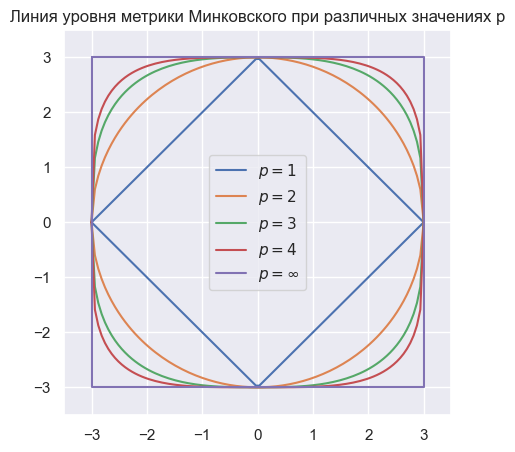

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()


def compute_y(xs, p, r):
    r_p = r ** p
    ys = (r_p - np.abs(xs) ** p) ** (1.0 / p)
    return ys


r = 3
plt.figure(figsize=(5,5))
xs = np.linspace(-r, r, 100)

colors = ['green', 'red', 'blud']
for p in (1, 2, 3, 4):
    ys = compute_y(xs, p, r)
    all_xs = np.concatenate([xs, xs[::-1]])
    all_ys = np.concatenate([ys, -ys[::-1]])
    plt.plot(all_xs, all_ys, label=f'$p={p}$')
    
    
margin = 0.5

ys = r * np.ones_like(xs)
all_xs = np.concatenate([xs, xs[::-1], [xs[0]]])
all_ys = np.concatenate([ys, -ys[::-1], [r]])
plt.plot(all_xs, all_ys, label=f'$p=\infty$')

plt.xlim(-r - margin, r + margin)
plt.ylim(-r - margin, r + margin)
plt.legend()
plt.title('Линия уровня метрики Минковского при различных значениях p')

## Шум
Шумовые признаки могут оказываться значительное влияние на работу KNN

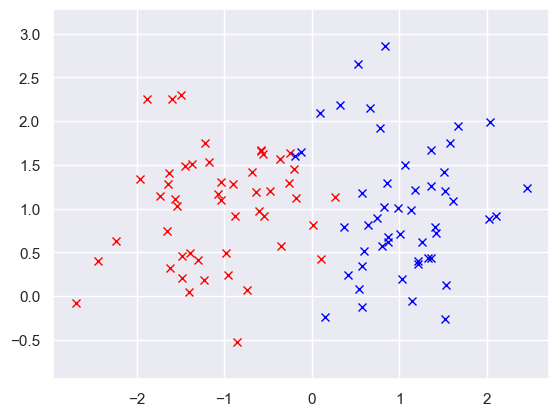

In [45]:
mean0 = [-1, 1]
cov0 = [[0.5, 0], [0, 0.5]]

mean1 = [1, 1]
cov1 = [[0.5, 0], [0, 0.5]]

x0, y0 = np.random.multivariate_normal(mean0, cov0, 50).T
x1, y1 = np.random.multivariate_normal(mean1, cov1, 50).T
plt.plot(x0, y0, 'x', c='red')
plt.plot(x1, y1, 'x', c='blue')
plt.axis('equal')
plt.show()


labels = [0] * 50 + [1] * 50


xs = np.vstack([
    np.vstack([x0, y0]).T,
    np.vstack([x1, y1]).T,
])
    

In [65]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=10).fit(xs, labels)
predicted = knn.predict(xs)
print('Accuracy', (predicted == labels).mean())

Accuracy 0.97


In [70]:
noise = np.random.randn(100) * 4
xs_with_noise = np.hstack([xs, noise.reshape(-1, 1)])

knn_with_noise = KNN(n_neighbors=10).fit(xs_with_noise, labels)
predicted = knn_with_noise.predict(xs_with_noise)
print('Accuracy', (predicted == labels).mean())

Accuracy 0.93


## Проклятие размерности
Под проклятием размерности могут подразумеваться различные наблюдения:
1. С ростом размерности отношения объема единочного шара к единочному кубу стремиться к нулю.2
1. С ростом размерности каждая координата вносит меньший вклад в расстояние, что усложняет алгоритмы поиска ближайших соседей.

## Алгоритмы для поиска ближайших соседей
1. Полный перебор
2. Ball-tree
3. KD-tree

## Приближенный поиск соседей
Можно искать приблежленно, допуская некоторое количество ошибок.
Популярным алгоритом является [HSNW](https://arxiv.org/abs/1603.09320) — Hierarchical Navigable Small Worlds.
Он основан на анализе полного графа, в котором вершинами являются объекты, а вес ребра — это расстояние между ребреами.

Существует множетсво реализаций для приближенного поиска ближайших соседей:
[Faiss](https://github.com/facebookresearch/faiss),  [NMSLib](https://github.com/nmslib/nmslib), [Annoy](https://github.com/spotify/annoy).

## Metric Learning
Кроме того, чтобы запонимать точки в простравнстве и искать ближайшие, можно отобразить исходные объекты в некоторое пространство $\mathbb{R}^n$, чтобы образы объектов из одного класса были близки друг к другу, а образы объектов из разных классов — далеки.

Самыми эффективными методами постороение таких отображений являются нейросети, поэтому подробнее будет рассказано в соотвествующем разделе курса про глубокое обучение.